In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline

In [2]:
data=pd.read_csv('survey_results_public.csv')

In [3]:
print(pd.read_csv('survey_results_schema.csv'))

                          Column  \
0                     Respondent   
1                   Professional   
2                   ProgramHobby   
3                        Country   
4                     University   
5               EmploymentStatus   
6                FormalEducation   
7                 MajorUndergrad   
8                     HomeRemote   
9                    CompanySize   
10                   CompanyType   
11                  YearsProgram   
12                 YearsCodedJob   
13             YearsCodedJobPast   
14                 DeveloperType   
15              WebDeveloperType   
16           MobileDeveloperType   
17              NonDeveloperType   
18            CareerSatisfaction   
19               JobSatisfaction   
20                 ExCoderReturn   
21               ExCoderNotForMe   
22                ExCoderBalance   
23                ExCoder10Years   
24               ExCoderBelonged   
25                 ExCoderSkills   
26            ExCoderWillNot

In [4]:
df=pd.DataFrame(data)

# Top 10 countries

In [5]:
print("Country \t Number of users")
print(df['Country'].value_counts().nlargest(10))

Country 	 Number of users
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64


# University students

In [6]:
university=((df['University'].value_counts()/len(df)*100).values.reshape([-1,1]))
university=list(university)
for i in range(0,len(university)):
    university[i]=float(university[i])

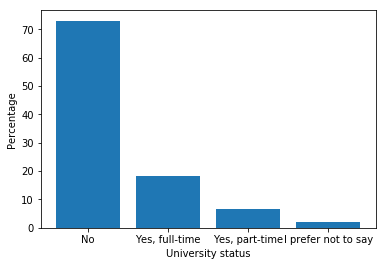

In [7]:
plt.bar(df['University'].unique(),university)
plt.xlabel("University status")
plt.ylabel("Percentage")
plt.show()

# Professions of Stackoverflow users

In [8]:
profession=((df['Professional'].value_counts()/len(df)*100).values.reshape([-1,1]))
profession=list(profession)
for i in range(0,len(profession)):
    profession[i]=float(profession[i])

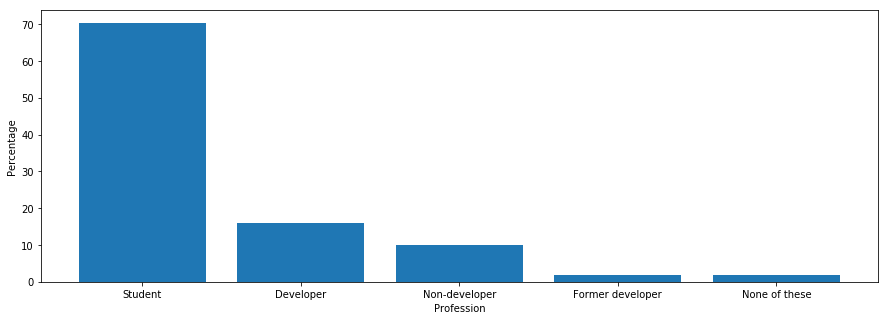

In [9]:
plt.figure(figsize=(15,5))
plt.bar(['Student', 'Developer', 'Non-developer','Former developer', 'None of these'],profession)
plt.xlabel("Profession")
plt.ylabel("Percentage")
plt.show()

# Web developer stats

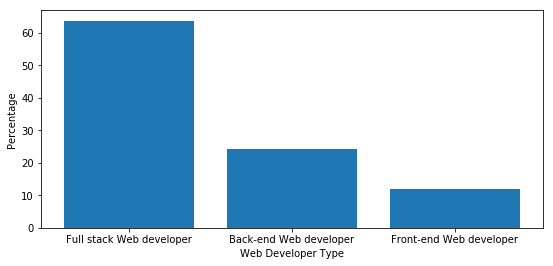

In [10]:
webtype=((df['WebDeveloperType'].dropna().value_counts()/len(df['WebDeveloperType'].dropna())*100).values.reshape([-1,1]))
webtype=list(webtype)
for i in range(0,len(webtype)):
    webtype[i]=float(webtype[i])
plt.figure(figsize=(9,4))
plt.bar(df['WebDeveloperType'].dropna().unique(),webtype)
plt.xlabel("Web Developer Type")
plt.ylabel("Percentage")
plt.show()

# Mobiles developer stats (multiple answers allowed)

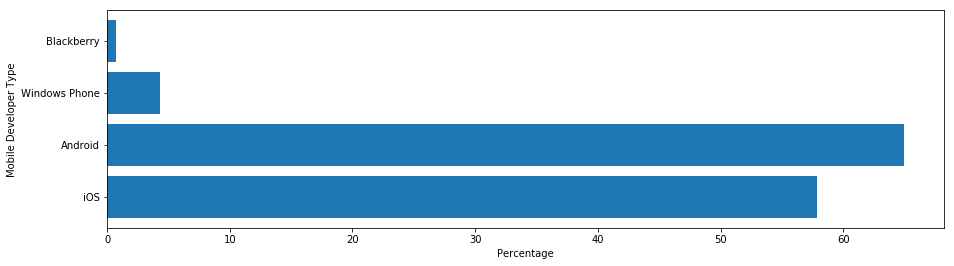

In [11]:
mobtypes=['iOS','Android','Windows Phone', 'Blackberry']
mobdata=df['MobileDeveloperType'].dropna().to_string()
countMobTypes=[]
for mobtype in mobtypes:
    countMobTypes.append(df['MobileDeveloperType'].dropna().to_string().count(mobtype)*100/len(df['MobileDeveloperType'].dropna()))
plt.figure(figsize=(15,4))
plt.barh(mobtypes,countMobTypes)
plt.ylabel("Mobile Developer Type")
plt.xlabel("Percentage")
plt.show()

# Satisfaction with Stackoverflow

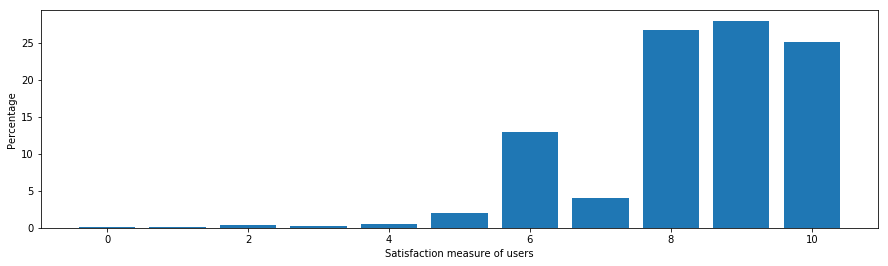

In [12]:
satisfaction=((df['StackOverflowSatisfaction'].dropna().value_counts()/len(df['StackOverflowSatisfaction'].dropna())*100).values.reshape([-1,1]))
satisfaction=list(satisfaction)
for i in range(0,len(satisfaction)):
    satisfaction[i]=float(satisfaction[i])
plt.figure(figsize=(15,4))
plt.bar(df['StackOverflowSatisfaction'].dropna().unique(),satisfaction)
plt.xlabel("Satisfaction measure of users")
plt.ylabel("Percentage")
plt.show()

# Job status

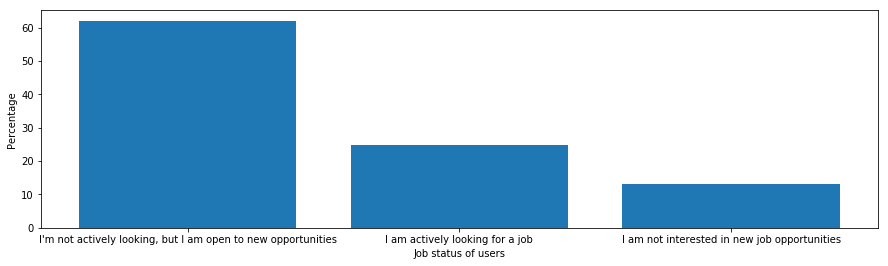

In [13]:
job=((df['JobSeekingStatus'].dropna().value_counts()/len(df['JobSeekingStatus'].dropna())*100).values.reshape([-1,1]))
job=list(job)
for i in range(0,len(job)):
    job[i]=float(job[i])
plt.figure(figsize=(15,4))
plt.bar(df['JobSeekingStatus'].dropna().unique(),job)
plt.xlabel("Job status of users")
plt.ylabel("Percentage")
plt.show()

# Version Control Used

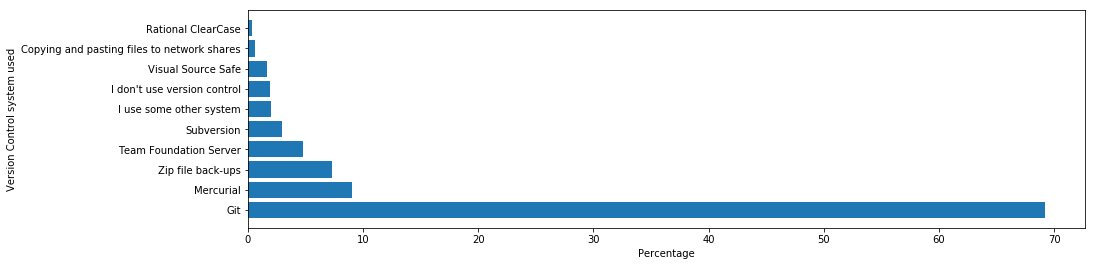

In [14]:
vc=((df['VersionControl'].dropna().value_counts()/len(df['VersionControl'].dropna())*100).values.reshape([-1,1]))
vc=list(vc)
for i in range(0,len(vc)):
    vc[i]=float(vc[i])
plt.figure(figsize=(15,4))
plt.barh(df['VersionControl'].dropna().unique(),vc)
plt.ylabel("Version Control system used")
plt.xlabel("Percentage")
plt.show()

# Company Type in which users work

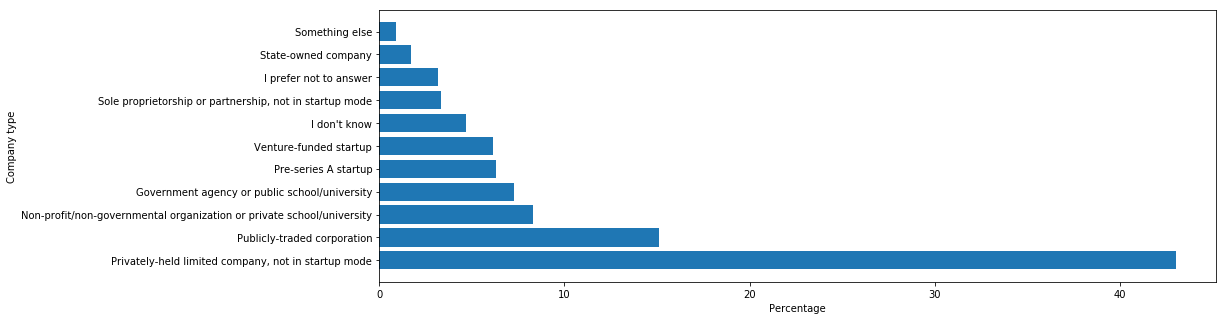

In [15]:
ctype=((df['CompanyType'].dropna().value_counts()/len(df['CompanyType'].dropna())*100).values.reshape([-1,1]))
ctype=list(ctype)
for i in range(0,len(ctype)):
    ctype[i]=float(ctype[i])
plt.figure(figsize=(15,5))
plt.barh(df['CompanyType'].dropna().unique(),ctype)
plt.ylabel("Company type")
plt.xlabel("Percentage")
plt.show()

# Field of study of users

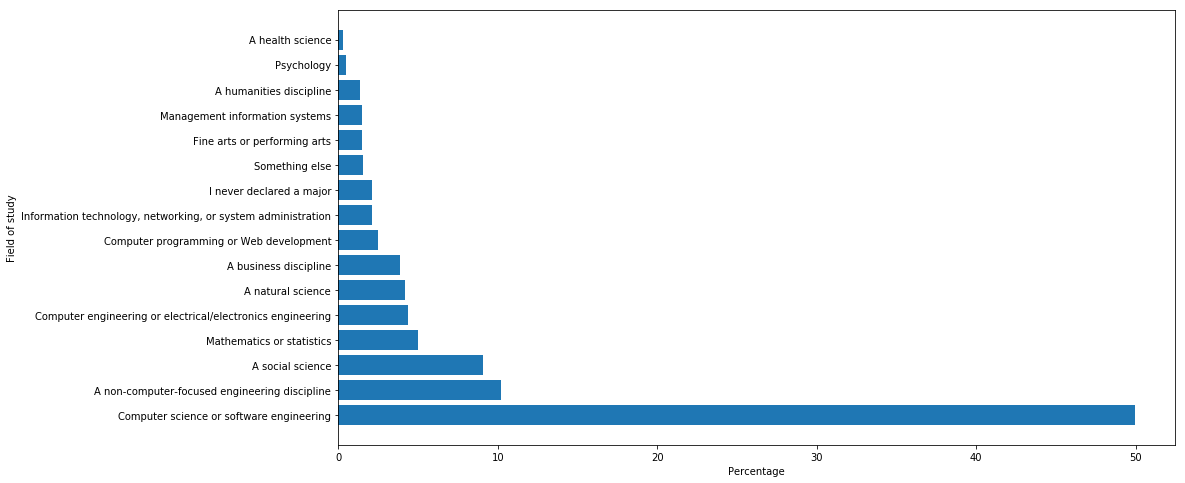

In [16]:
major=((df['MajorUndergrad'].dropna().value_counts()/len(df['MajorUndergrad'].dropna())*100).values.reshape([-1,1]))
major=list(major)
for i in range(0,len(major)):
    major[i]=float(major[i])
plt.figure(figsize=(15,8))
plt.barh(df['MajorUndergrad'].dropna().unique(),major)
plt.ylabel("Field of study")
plt.xlabel("Percentage")
plt.show()

# Important parameters for Hiring

In [17]:
paramtersHiring=["Algorithms","TechExp","Communication","OpenSource","PMExp","Companies","Titles","Education","Rep","GettingThingsDone"]

In [18]:
preserved_mapper = {'Very important':4, 'Somewhat important':3, 'Important':2, 'Not very important':1, 'Not at all important':0}

In [19]:
resultHiring=[preserved_mapper[stat.mode(df.ImportantHiringAlgorithms.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringTechExp.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringCommunication.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringOpenSource.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringPMExp.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringPMExp.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringCompanies.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringTitles.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringEducation.dropna())],
             preserved_mapper[stat.mode(df.ImportantHiringRep.dropna())]]

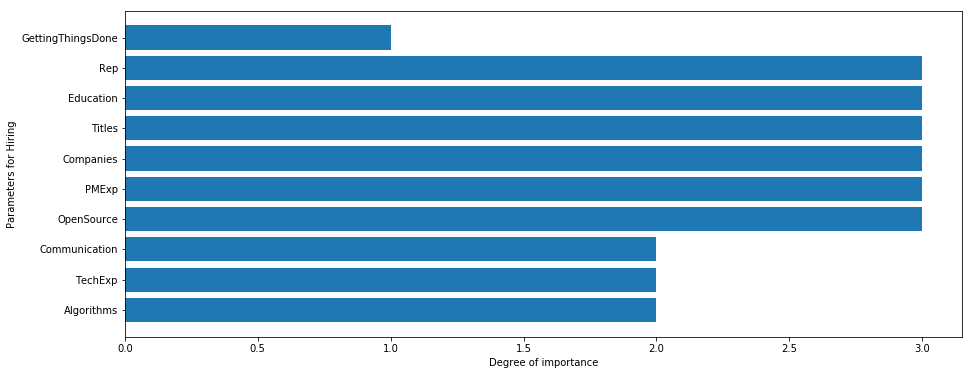

In [20]:
plt.figure(figsize=(15,6))
plt.barh(paramtersHiring,resultHiring)
plt.xlabel("Degree of importance")
plt.ylabel("Parameters for Hiring")
plt.show()

# Important benefits for employees (multiple answers allowed)

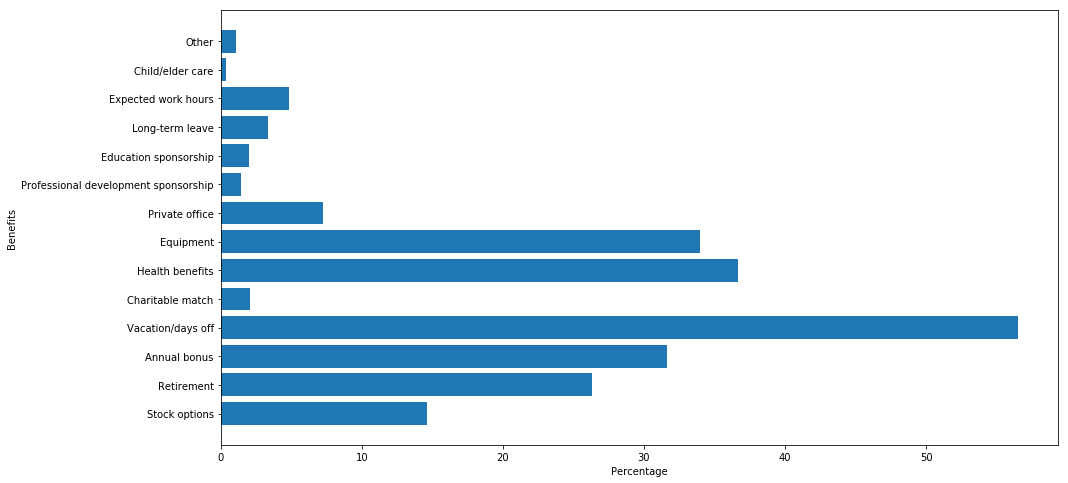

In [21]:
benefits=['Stock options','Retirement','Annual bonus','Vacation/days off','Charitable match','Health benefits','Equipment','Private office','Professional development sponsorship','Education sponsorship','Long-term leave','Expected work hours','Child/elder care','Other']
benefitdata=df['ImportantBenefits'].dropna().to_string()
countBenefits=[]
for benefit in benefits:
    countBenefits.append(df['ImportantBenefits'].dropna().to_string().count(benefit)*100/len(df['ImportantBenefits'].dropna()))
plt.figure(figsize=(15,8))
plt.barh(benefits,countBenefits)
plt.ylabel("Benefits")
plt.xlabel("Percentage")
plt.show()

# IDE used (multiple answers allowed)

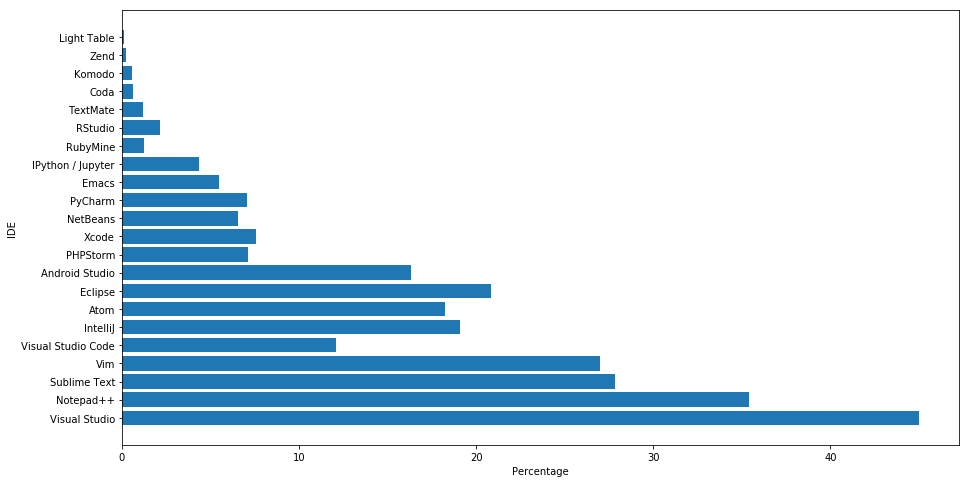

In [22]:
ides=['Visual Studio','Notepad++','Sublime Text','Vim','Visual Studio Code','IntelliJ','Atom','Eclipse','Android Studio','PHPStorm','Xcode','NetBeans','PyCharm','Emacs','IPython / Jupyter','RubyMine','RStudio','TextMate','Coda','Komodo','Zend','Light Table']
idedata=df['IDE'].dropna().to_string()
countIdes=[]
for ide in ides:
    countIdes.append(df['IDE'].dropna().to_string().count(ide)*100/len(df['IDE'].dropna()))
plt.figure(figsize=(15,8))
plt.barh(ides,countIdes)
plt.ylabel("IDE")
plt.xlabel("Percentage")
plt.show()

# Most popular languages (multiple answers allowed)

In [23]:
def splitData(df):
    results=[]
    for i in df:
        if(';' in i):
            new=i.split('; ')
            for j in new:
                results.append(j)
        else:
            results.append(i)
    return results

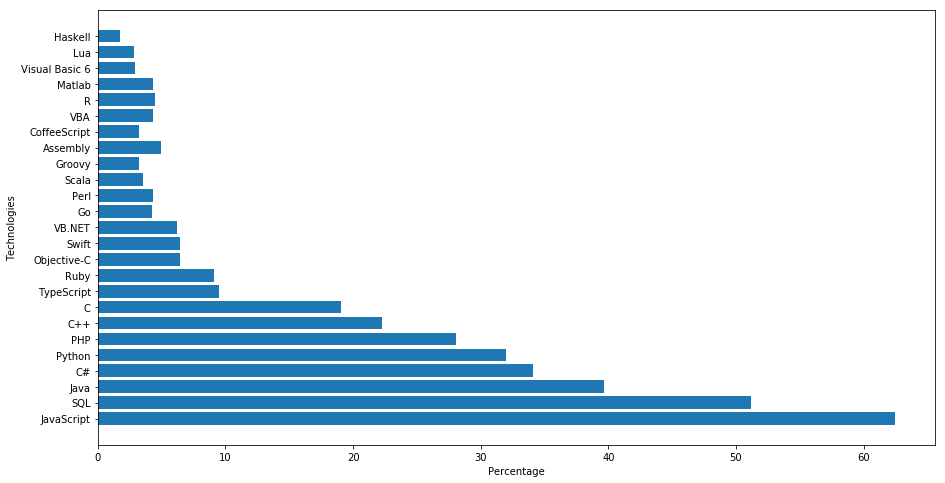

In [24]:
langdata=splitData(df['HaveWorkedLanguage'].dropna())
langs=['JavaScript','SQL','Java','C#','Python','PHP','C++','C','TypeScript','Ruby','Objective-C','Swift','VB.NET','Go',
      'Perl','Scala','Groovy','Assembly','CoffeeScript','VBA','R','Matlab','Visual Basic 6','Lua','Haskell']    
countlangs=[]
for lang in langs:
    countlangs.append(langdata.count(lang)*100/len(df['HaveWorkedLanguage'].dropna()))
plt.figure(figsize=(15,8))
plt.barh(langs,countlangs)
plt.ylabel("Technologies")
plt.xlabel("Percentage")
plt.show()

# Most wanted languages (multiple answers allowed)

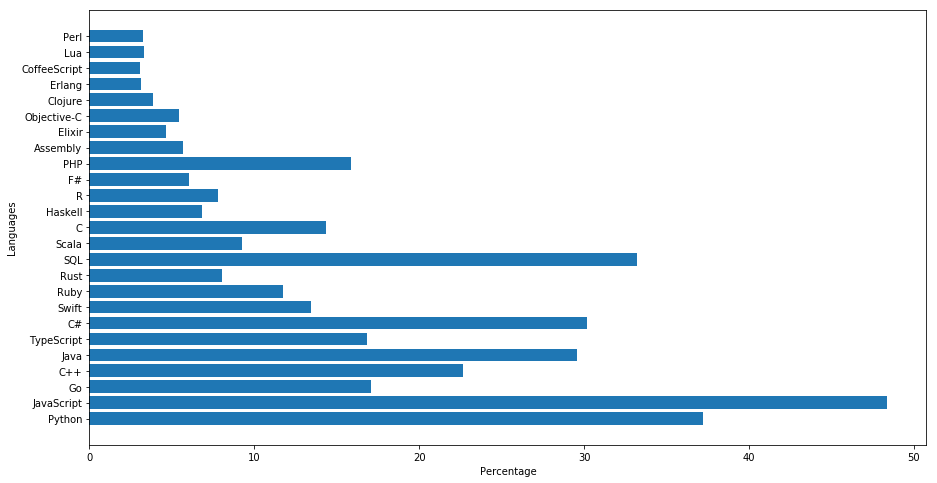

In [29]:
wlangdata=splitData(df['WantWorkLanguage'].dropna())
wlangs=['Python','JavaScript','Go','C++','Java','TypeScript','C#','Swift','Ruby','Rust','SQL','Scala','C','Haskell',
      'R','F#','PHP','Assembly','Elixir','Objective-C','Clojure','Erlang','CoffeeScript','Lua','Perl']    
wcountlangs=[]
for wlang in wlangs:
    wcountlangs.append(wlangdata.count(wlang)*100/len(df['WantWorkLanguage'].dropna()))
plt.figure(figsize=(15,8))
plt.barh(wlangs,wcountlangs)
plt.ylabel("Languages")
plt.xlabel("Percentage")
plt.show()

# Most popular frameworks (multiple answers allowed)

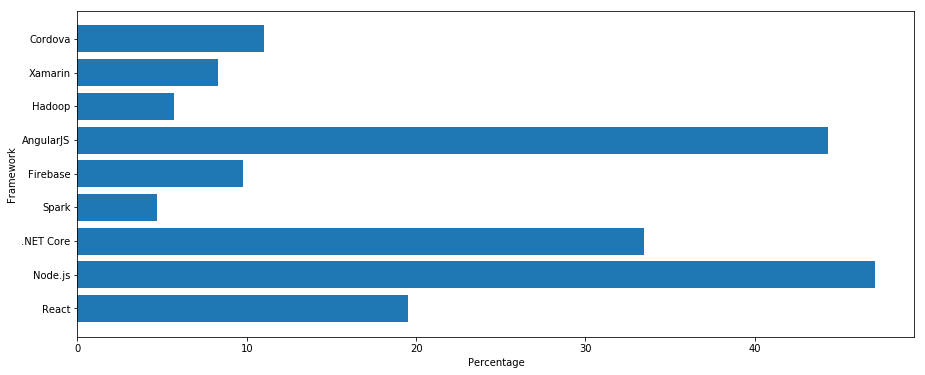

In [32]:
frameworkdata=splitData(df['HaveWorkedFramework'].dropna())
frameworks=['React','Node.js','.NET Core','Spark','Firebase','AngularJS','Hadoop','Xamarin','Cordova']    
countframeworks=[]
for framework in frameworks:
    countframeworks.append(frameworkdata.count(framework)*100/len(df['HaveWorkedFramework'].dropna()))
plt.figure(figsize=(15,6))
plt.barh(frameworks,countframeworks)
plt.ylabel("Framework")
plt.xlabel("Percentage")
plt.show()

# Most wanted frameworks (multiple answers allowed)

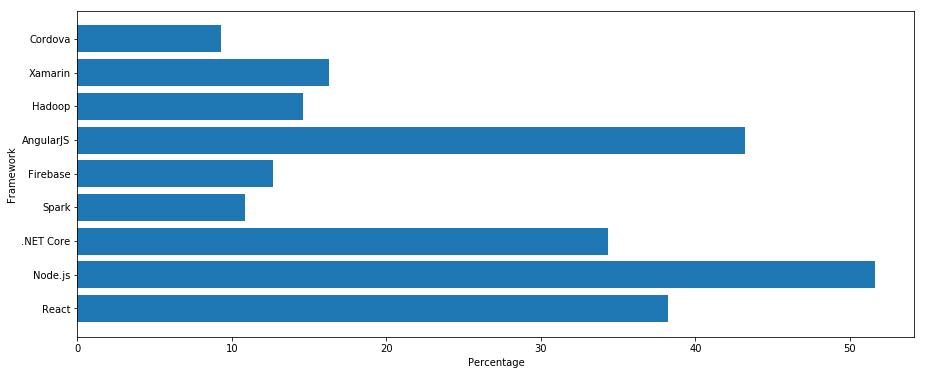

In [33]:
wframeworkdata=splitData(df['WantWorkFramework'].dropna())
wframeworks=['React','Node.js','.NET Core','Spark','Firebase','AngularJS','Hadoop','Xamarin','Cordova']    
wcountframeworks=[]
for wframework in wframeworks:
    wcountframeworks.append(wframeworkdata.count(wframework)*100/len(df['WantWorkFramework'].dropna()))
plt.figure(figsize=(15,6))
plt.barh(wframeworks,wcountframeworks)
plt.ylabel("Framework")
plt.xlabel("Percentage")
plt.show()

# Most popular databases (multiple answers allowed)

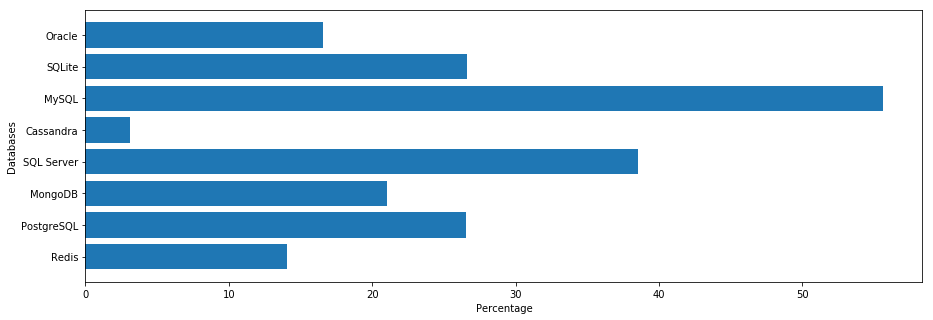

In [36]:
dbdata=splitData(df['HaveWorkedDatabase'].dropna())
dbs=['Redis','PostgreSQL','MongoDB','SQL Server','Cassandra','MySQL','SQLite','Oracle']    
countdb=[]
for db in dbs:
    countdb.append(dbdata.count(db)*100/len(df['HaveWorkedDatabase'].dropna()))
plt.figure(figsize=(15,5))
plt.barh(dbs,countdb)
plt.ylabel("Databases")
plt.xlabel("Percentage")
plt.show()

# Most wanted databases (multiple answers allowed)

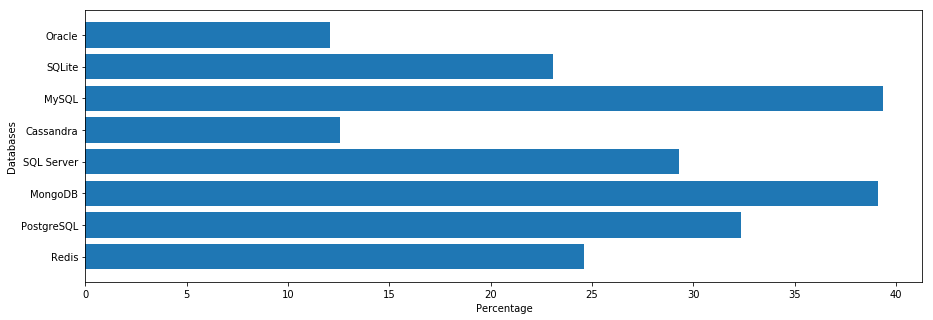

In [38]:
wdbdata=splitData(df['WantWorkDatabase'].dropna())
wdbs=['Redis','PostgreSQL','MongoDB','SQL Server','Cassandra','MySQL','SQLite','Oracle']    
wcountdb=[]
for wdb in wdbs:
    wcountdb.append(wdbdata.count(wdb)*100/len(df['WantWorkDatabase'].dropna()))
plt.figure(figsize=(15,5))
plt.barh(wdbs,wcountdb)
plt.ylabel("Databases")
plt.xlabel("Percentage")
plt.show()

# Most popular platforms (multiple answers allowed)

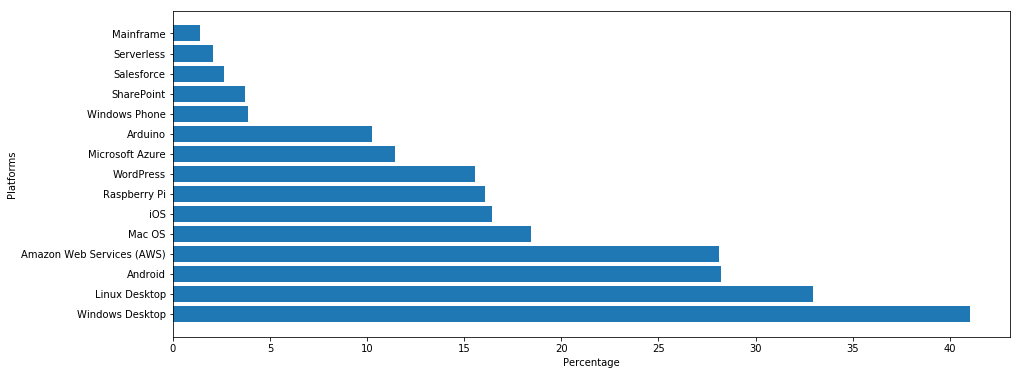

In [44]:
platformdata=splitData(df['HaveWorkedPlatform'].dropna())
platforms=['Windows Desktop','Linux Desktop','Android','Amazon Web Services (AWS)','Mac OS','iOS','Raspberry Pi','WordPress','Microsoft Azure','Arduino','Windows Phone','SharePoint','Salesforce','Serverless','Mainframe']
countplatforms=[]
for platform in platforms:
    countplatforms.append(platformdata.count(platform)*100/len(df['HaveWorkedPlatform'].dropna()))
plt.figure(figsize=(15,6))
plt.barh(platforms,countplatforms)
plt.ylabel("Platforms")
plt.xlabel("Percentage")
plt.show()

# Most wanted platforms (multiple answers allowed)

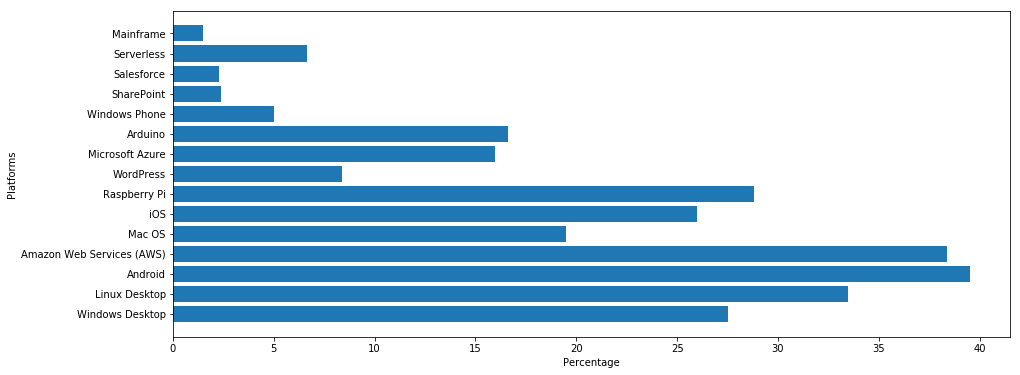

In [43]:
wplatformdata=splitData(df['WantWorkPlatform'].dropna())
wplatforms=['Windows Desktop','Linux Desktop','Android','Amazon Web Services (AWS)','Mac OS','iOS','Raspberry Pi','WordPress','Microsoft Azure','Arduino','Windows Phone','SharePoint','Salesforce','Serverless','Mainframe']
wcountplatforms=[]
for wplatform in wplatforms:
    wcountplatforms.append(wplatformdata.count(wplatform)*100/len(df['WantWorkPlatform'].dropna()))
plt.figure(figsize=(15,6))
plt.barh(wplatforms,wcountplatforms)
plt.ylabel("Platforms")
plt.xlabel("Percentage")
plt.show()